In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
df=pd.read_csv('placement.csv')

In [55]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [56]:
df.shape

(100, 4)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    int64  
 3   placement   100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 KB


In [58]:
d=df.iloc[:,1:]
d

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0
...,...,...,...
95,4.3,200,0
96,4.4,42,0
97,6.7,182,1
98,6.3,103,1


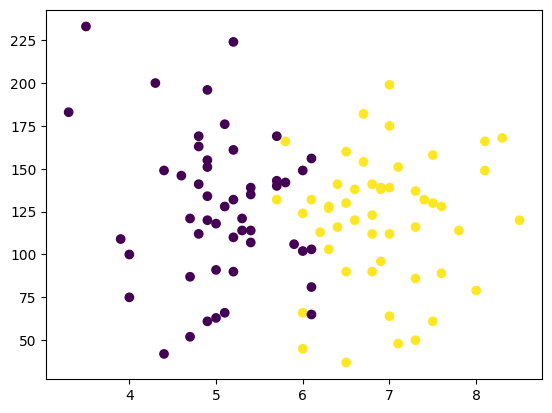

In [59]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [60]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [61]:
x

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [62]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [64]:
x_test

,Unnamed: 0,cgpa
11,11,6.9
51,51,4.8
6,6,5.7
22,22,4.9
86,86,5.1
42,42,7.6
31,31,3.9
64,64,7.0
87,87,5.7
78,78,6.1


In [65]:
scaler=StandardScaler()

In [66]:
x_train= scaler.fit_transform(x_train)

In [67]:
x_train

array([[-0.75117849, -0.71517273],
       [-1.6516691 , -0.62748125],
       [ 0.56492317,  0.77558242],
       [-0.33556744, -0.97824717],
       [ 0.91126571, -0.97824717],
       [ 0.0107751 , -2.20592788],
       [-0.02385915, -0.53978977],
       [-1.47849783, -0.89055569],
       [ 1.56931654, -1.50439605],
       [ 0.32248339, -1.06593865],
       [ 0.53028891,  1.82788017],
       [ 1.04980273, -0.97824717],
       [ 0.3917519 ,  1.12634833],
       [-0.37020169, -1.24132161],
       [-1.54776634,  0.95096538],
       [ 1.53468228, -1.15363013],
       [-1.20142379, -0.80286421],
       [ 1.46541378, -0.71517273],
       [ 0.46102041,  0.24943354],
       [-1.68630335, -0.10133238],
       [-1.09752103, -1.76747048],
       [ 0.25321488,  0.4248165 ],
       [-0.71654424,  0.8632739 ],
       [-0.54337297, -1.06593865],
       [ 0.87663146, -1.06593865],
       [-1.06288678, -0.71517273],
       [ 0.94589996,  1.12634833],
       [-1.13215529, -2.38131084],
       [ 1.15370549,

In [68]:
x_test= scaler.transform(x_test)

In [69]:
x_test   

array([[-1.33996081,  0.77558242],
       [ 0.04540936, -1.06593865],
       [-1.51313208, -0.27671533],
       [-0.95898401, -0.97824717],
       [ 1.25760825, -0.80286421],
       [-0.26629893,  1.38942277],
       [-0.64727573, -1.85516196],
       [ 0.49565466,  0.8632739 ],
       [ 1.2922425 , -0.27671533],
       [ 0.98053422,  0.07405058]])

In [70]:
y_test

11    1
51    0
6     0
22    0
86    0
42    1
31    0
64    1
87    1
78    0
Name: placement, dtype: int64

In [71]:
clf= LogisticRegression()

In [72]:

clf.fit(x_train,y_train)

LogisticRegression()

In [73]:
clf.predict(x_test)

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [74]:
y_pred=clf.predict(x_test)

In [75]:
y_test

11    1
51    0
6     0
22    0
86    0
42    1
31    0
64    1
87    1
78    0
Name: placement, dtype: int64

In [76]:
accuracy_score(y_test,y_pred)

0.8

In [77]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

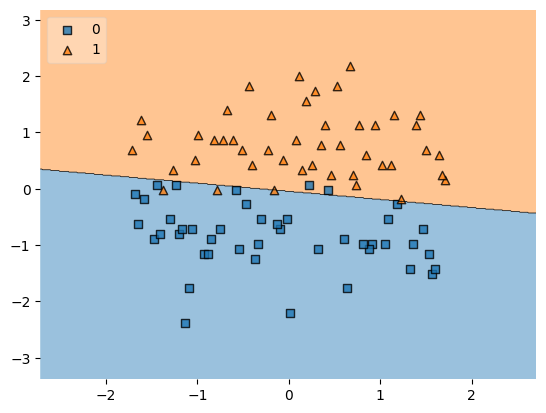

In [78]:
plot_decision_regions(x_train,y_train.values, clf=clf, legend=2)